In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 5000 

In [2]:
# Load the data online or offline

# ecr_data = web.DataReader('ecr.l', 'av-daily', start=datetime(2020, 1, 1), end=datetime(2021, 9, 24), api_key='EUWPYIBX33PPD5U5')
# data = ecr_data 

# 注意：从csv导入时，index不是‘日期’了。网络加载的data没有这个问题。

data = pd.read_csv(r'/Users/paxton615/Desktop/ECR_csv.csv')

In [3]:
print(data.head(3))
print(data.tail(3))

   Unnamed: 0   open  high     low  close   volume
0  2020-01-02  0.725  0.78  0.6825  0.725   482605
1  2020-01-03  0.725  0.78  0.7150  0.725  1741346
2  2020-01-07  0.670  0.67  0.6690  0.670   309251
     Unnamed: 0   open  high    low  close    volume
393  2021-07-23  1.500  1.60  1.483  1.575   6036634
394  2021-07-26  1.575  1.75  1.565  1.625  11248950
395  2021-07-27  1.650  1.70  1.566  1.600   5443371


- Construct new dataframe, insert placing and warranty data

In [4]:
# Copy data
df = data
ecr = df[['Unnamed: 0','close']]
ecr.columns = ['date','close']
ecr.set_index('date', drop=True, inplace=True)
print(ecr.tail(3))
print('-----------------')
print(len(ecr))

            close
date             
2021-07-23  1.575
2021-07-26  1.625
2021-07-27  1.600
-----------------
396


- Insert 1st Placing data

In [5]:
ecr_p1_sprice = 0.5
ecr_p1_wprice = 1
ecr_p2_sprice = 1.3
ecr_p2_wprice = 2

In [6]:
# 1st placing price is 0.5, date '2020-04-01'
ecr['p1_sprice'] = [ecr_p1_sprice if i  >= '2020-04-01' else None for i in ecr.index]

# 1st placing warranty is 1, date '2020-04-01'
ecr['p1_wprice'] = [ecr_p1_wprice if i  >= '2020-04-01' else None for i in ecr.index]

In [7]:
# 2nd placing price is 1.3, date '2020-07-01'
ecr['p2_sprice'] = [ecr_p2_sprice if i  >= '2020-07-01' else None for i in ecr.index]

# 2nd placing warranty is 2, date '2020-07-01'
ecr['p2_wprice'] = [ecr_p2_wprice if i  >= '2020-07-01' else None for i in ecr.index]

- If investor put 5000 pounds for each placing, calculate share and warranty positions. 
- Share vs Warranty is 1:1

In [8]:
ecr['p1_sposition'] = [5000/ecr_p1_sprice if i >= '2020-04-01' else None for i in ecr.index]
ecr['p1_wposition'] = ecr['p1_sposition']


#### 注意：日期千万不能写错'2020-07-04'与'2020-7-04'有天差地别

In [9]:
ecr['p2_sposition'] = [round(5000/ecr_p2_sprice,0) if i >= '2020-07-01' else None for i in ecr.index]
ecr['p2_wposition'] = ecr['p2_sposition']


- Calculate investor's daily profit per share

#### 注意：股价盈利有盈有亏，但权证是只盈不亏的。

In [10]:
# Profit from the shares

ecr['p1_sprft'] = ecr.close - ecr['p1_sprice']

ecr['p2_sprft'] = ecr.close - ecr['p2_sprice']

In [11]:
# Profit from the warranties

p1_wprofit = []
for i,j in zip(ecr.close, ecr['p1_wprice']):
    if i - j >0:
        p1_wprofit.append(round(i-j,3))
    else:
        p1_wprofit.append(0)

ecr['p1_wprft'] = p1_wprofit

p2_wprofit = []
for i,j in zip(ecr.close, ecr['p2_wprice']):
    if i - j >0:
        p2_wprofit.append(round(i-j,3))
    else:
        p2_wprofit.append(0)

ecr['p2_wprft'] = p2_wprofit

In [12]:
ecr.fillna(0.0, inplace=True)

In [13]:
ecr['total_prft'] = 10000 * ecr['p1_sprft'] + 10000 * ecr['p1_wprft'] +\
                    3846 * ecr['p2_sprft'] + 3846 * ecr['p2_wprft']

In [14]:
ecr['per_pw_prft'] = ecr['p1_sprft'] +  ecr['p1_wprft'] +\
                     ecr['p2_sprft'] + ecr['p2_wprft']
    

In [19]:
ecr

,close,p1_sprice,p1_wprice,p2_sprice,p2_wprice,p1_sposition,p1_wposition,p2_sposition,p2_wposition,p1_sprft,p2_sprft,p1_wprft,p2_wprft,total_prft,per_pw_prft
date,,,,,,,,,,,,,,,
2020-01-02,0.7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-03,0.7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-07,0.6700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-08,0.6500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-09,0.6790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-10,0.6990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-13,0.7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-14,0.7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000
2020-01-15,0.7250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000,0.000,0.0000,0.0000


### 从下图中可以看出，每一股的收益随着权证的加入，有了成倍的提高。

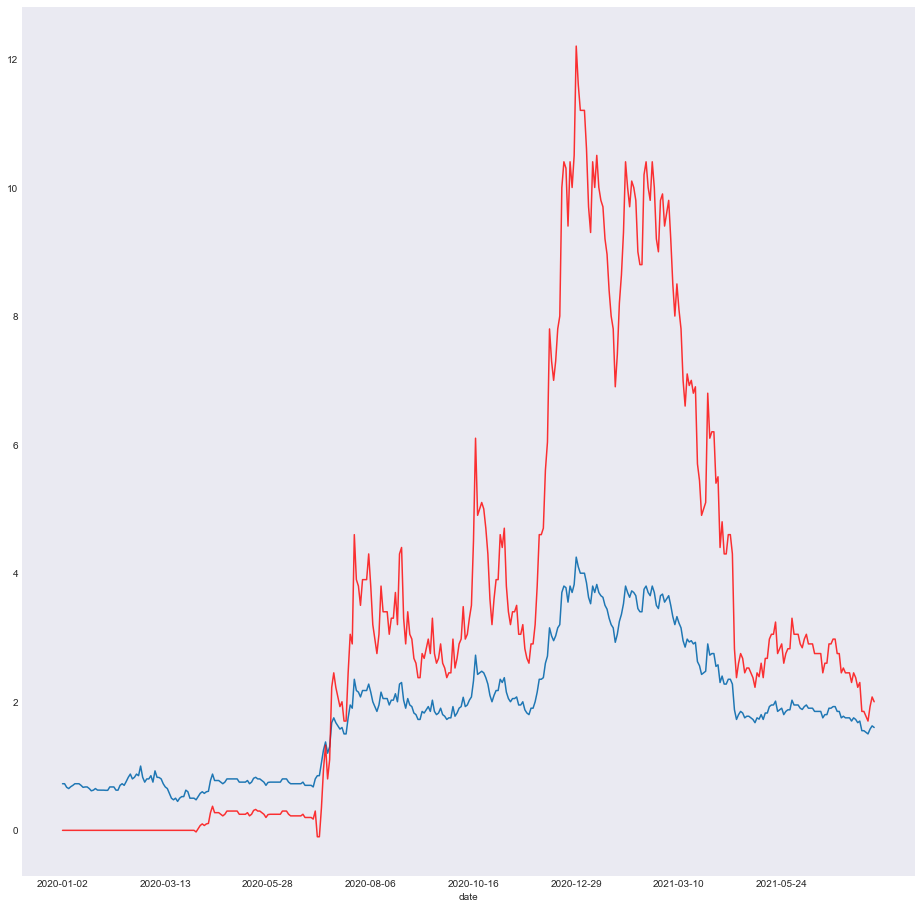

In [25]:
plt.figure(figsize=(16,16))
plt.style.use('seaborn-dark')
ecr.close.plot()
ecr.per_pw_prft.plot(color='r', alpha=0.8);


### 红线是成本。红线和曲线之间的空间即为投资者的潜在获利空间

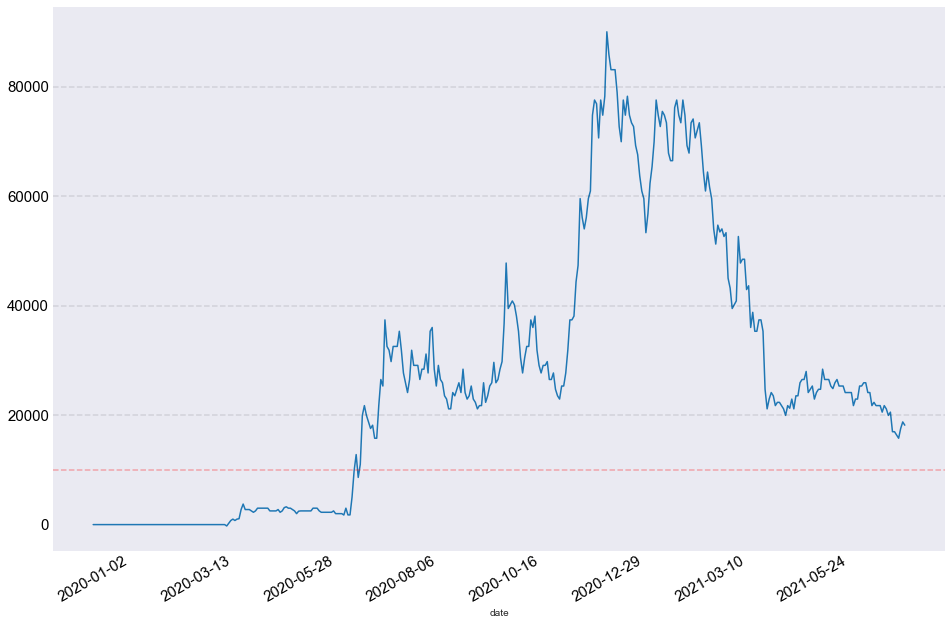

In [39]:
plt.figure(figsize=(16,10))
ecr.total_prft.plot();
plt.axhline(y=10000, color='r', linestyle='dashed', alpha=0.3)
plt.axhline(y=20000, color='k', linestyle='dashed', alpha=0.1)
plt.axhline(y=40000, color='k', linestyle='dashed', alpha=0.1)
plt.axhline(y=60000, color='k', linestyle='dashed', alpha=0.1)
plt.axhline(y=80000, color='k', linestyle='dashed', alpha=0.1)
plt.yticks(fontsize=15,color='k')
plt.xticks( fontsize=15,color='k', rotation=30)
plt.show()